# **AP155 Lab Assignment** 
## Module 7: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 30 and 70 points, respectively).

_Due Date_: **5PM of January 7 (Fri)**


### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico \
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  12/22/2022, 16:38:22


### Submission Information

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SALINAS, Jose Enrico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [2]:
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### PROBLEM 1 (30 pts.; 50/50 for code & discussion) 
**Integration with Monte Carlo methods**

_Refer to Exercise 10.5 in the Newman text_ 

1. Evaluate this integral 
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$
using the "hit-or-miss" Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate. *(15 pts.)*

2. Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error. *(15 pts.)*

---

We are given a sinusoidal function that is not well-behaved near the boundaries but has a well-defined integral. Since prior integration methods estimate the integral using the curvature of the function, they will fail to account for the rapidly varying slop of the this integrand. We use Monte Carlo integration methods to get around this. \

We first define the integrand to estimate.

In [3]:
def f(x):
    return np.sin(1/(x*(2-x)))**2

We can then calculate an estimate as such. We randomly sample 10000 points spanning the domain and range of the function. We then count the number of points that lie under the curve of the function. The integral can be estimated as the proportion of points that fell under the curve.

In [4]:
N = 10000
in_points = 0

for i in range(N):
    x = 2*random.random()
    y = random.random()
    if y < f(x):
        in_points += 1

integral_mc = 2*in_points/N
print(integral_mc)

1.4592


We can also do the same using the mean value method. For 10000 randomly chosen x-values, we estimate the integral as the sum of $f(x)$ for our random samples scaled by the quotient of the area and the number of samples.

In [5]:
x_points = np.random.uniform(0, 2, N)
x_points[x_points == 0] = 1e-40
x_points[x_points == 2] = 2 - 1e-40

integral_mv = np.sum(f(x_points))*(2/N)
print(integral_mv)

1.446183828635912


In [6]:
analytic_value = 1.45
error_mc = (integral_mc - analytic_value)/analytic_value
error_mv = (integral_mv - analytic_value)/analytic_value

print('Error of Monte Carlo Integration: {}'.format(error_mc))
print('Error of Mean Value Integration: {}'.format(error_mv))

Error of Monte Carlo Integration: 0.006344827586206964
Error of Mean Value Integration: -0.0026318423200605867


Calculating the percent errors for each method shows that each estimate is accurate within two decimal places. Note that repeated estimates will differ since the sampled points are randomly selected. Moreover, increasing the number of steps by a factor of $k$ will improve the accuracy by a factor of $\sqrt{k}$ which is mostly negligible at this point.

---

### PROBLEM 2 (70 pts.; 50/50 for code & discussion) 
**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(20 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(20 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(20 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(10 pts.)*

---

The Ising model supposes that the dipoles of a magnet are strictly two-state systems and that the energy of interaction is from neighboring dipoles alone. Following these assumptions, we can demonstrate the behavior of a magnet through a Markov Chain Monte Carlo simulation.

We consider a 20 by 20 dipole lattice with a no net magnetization defined below.

---



In [7]:
steps = 20000
N = 20
J = 1
T = 1

In [8]:
spins = np.random.randint(0, 2, (N, N), int)
spins = -2*spins + 1

We can calculate the energy of interaction following the second assumption as 

$$\begin{equation}E = -J \sum_{\langle ij \rangle} s_i s_j\end{equation}$$

which we define as the following function:

In [9]:
def get_total_energy(arr):

    down_neighbor_energy = -J*np.sum(arr[0:N-1,:]*arr[1:N,:])
    right_neighbor_energy = -J*np.sum(arr[:,0:N-1]*arr[:,1:N])
    
    return down_neighbor_energy + right_neighbor_energy

Then, we perform the Markov Chain Monte Carlo simulation as such. First, we pick a random dipole in the lattice. We also select if we are going to flip the spin of the latice. Next, we calculate the new energy of the lattice for the given change. Lastly, if the energy of the system increases, we revert the change with a probability of $\exp\left[{-\frac{\Delta E}{T}}\right]$. We repeat this for 20000 steps to simulate the behavior of the magnet.

In [10]:
energies = np.zeros(steps+1, int)
energies[0] = get_total_energy(spins)


for step in range(steps):
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)

    if random.random() < 0.5:
        spins[x, y] = -spins[x, y]

    old_energy = energies[step]
    new_energy = get_total_energy(spins)
    delta_energy = new_energy - old_energy
    if (delta_energy > 0):
        if random.random() < np.exp(-delta_energy/T):
            spins[x, y] = -spins[x, y]
            new_energy = old_energy

    energies[step+1] = new_energy


We record the energy of the system at each step of the simulation to plot and observe that the lattice develops a spontaneous non-zero magnetization despite having no net-magnetization to begin with.

The system also randomly alternates between strong and weak magnetization. Dipoles in the lattice will tend to the lowest energy state (modelled by our probability distribution for rejecting the step). That is, they will tend to align with the spins of neighboring dipoles. The net effect is that the lattice displays ferromagnetic behavior. 

However, there is also a non-zero probability for the neighboring dipoles to become anti-parallel. If this occurs enough times, the latice polarization reverses and magnetizes in the opposite direction after some time. This process repeats randomly as we increase the number of steps. 

Text(0.5, 1.0, 'Markov chain simulation of a magnet under the Ising Model')

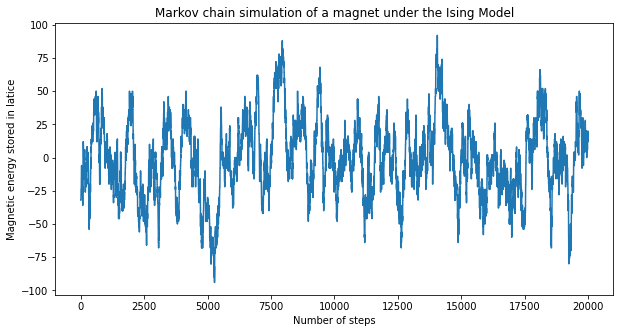

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=np.arange(0, steps+1), y=energies, ax=ax)
plt.xlabel('Number of steps')
plt.ylabel('Magnetic energy stored in latice')
plt.title('Markov chain simulation of a magnet under the Ising Model')